# 출생아 수 및 합계출산율

In [1]:
import pandas as pd

file_name = '출산율.xlsx'
df = pd.read_excel(file_name, skiprows=2, nrows=3, index_col=0, usecols='B:L')

C:\Users\parkj\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
df.index.values

array(['출생아수(명)', '조출생률(인구1천명당\xa0명)', '합계출산율(가임여성1명당\xa0명)'],
      dtype=object)

In [3]:
df.rename(index={'출생아수(명)':'출생아수', '조출생률(인구1천명당\xa0명)':'조출생율', '합계출산율(가임여성1명당\xa0명)':'합계출산율'}, inplace=True)

In [4]:
df.index.values

array(['출생아수', '조출생율', '합계출산율'], dtype=object)

In [5]:
df.drop(df.index[1], inplace=True)
df

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
출생아수,"436,455","435,435","438,420","406,243","357,771","326,822","302,676","272,337","260,562","249,186"
합계출산율,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.837,0.808,0.778


In [6]:
df.iloc[0] = df.iloc[0].str.replace(',', '').astype(int)
df.iloc[0] = df.iloc[0] // 1000

In [7]:
df

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
출생아수,436,435,438,406,357,326,302,272,260,249
합계출산율,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.837,0.808,0.778


In [8]:
df.index.values

array(['출생아수', '합계출산율'], dtype=object)

In [9]:
df.iloc[0]

2013    436
2014    435
2015    438
2016    406
2017    357
2018    326
2019    302
2020    272
2021    260
2022    249
Name: 출생아수, dtype: object

In [10]:
df = df.T # 방향 돌려서 볼 수 있음
df

,출생아수,합계출산율
2013,436,1.187
2014,435,1.205
2015,438,1.239
2016,406,1.172
2017,357,1.052
2018,326,0.977
2019,302,0.918
2020,272,0.837
2021,260,0.808
2022,249,0.778


In [11]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

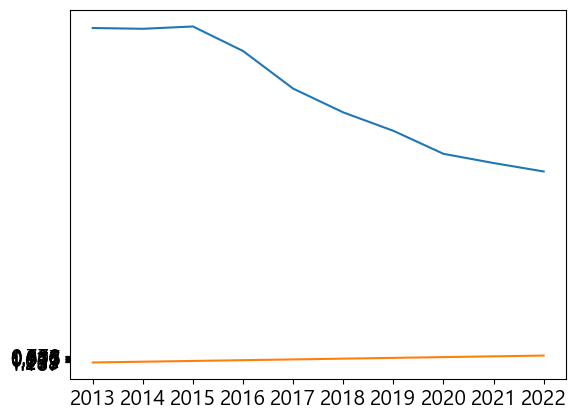

In [12]:
plt.plot(df.index, df['출생아수'])
plt.plot(df.index, df['합계출산율'])

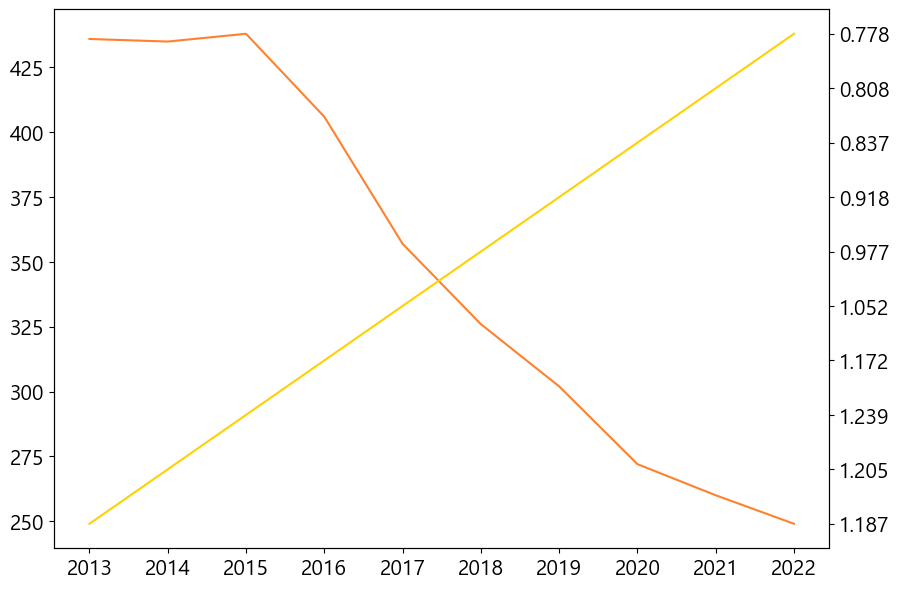

In [13]:
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.plot(df.index, df['출생아수'], color='#ff812d')

ax2 = ax1.twinx() # x 축을 공유하는 쌍둥이 axis
ax2.plot(df.index, df['합계출산율'], color='#ffd100')


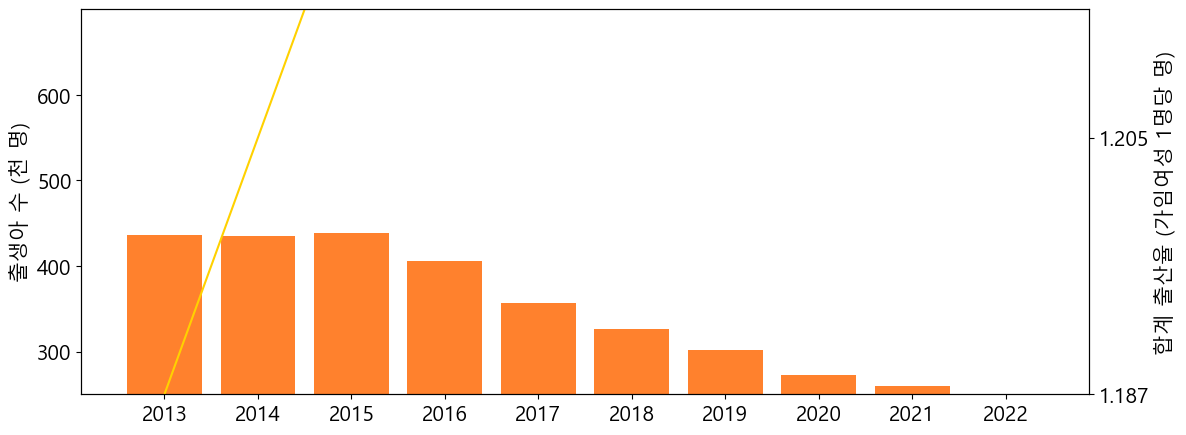

In [14]:
fig, ax1 = plt.subplots(figsize=(13, 5))
ax1.set_ylabel('출생아 수 (천 명)')
ax1.set_ylim(250, 700)
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df['출생아수'], color='#ff812d')

ax2 = ax1.twinx() # x 축을 공유하는 쌍둥이 axis
ax2.set_ylabel('합계 출산율 (가임여성 1명당 명)')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0, 1])
ax2.plot(df.index, df['합계출산율'], color='#ffd100')